# TP Final - Spotify

Juan E. Azar - Leandro Leon - Rodrigo Pazos 

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
df = pd.read_csv("./data/data_playlist.csv")
df

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713000,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192000,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333000,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601000,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883000,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.000175,0.374,333827,0.943,0.000156,6,0.1250,-4.108,0,0.0556,112.084,4,0.338,0
746,0.001970,0.487,213000,0.867,0.006020,10,0.0968,-3.293,0,0.0543,160.048,4,0.403,0
747,0.916000,0.605,125867,0.314,0.000000,0,0.3590,-7.631,1,0.0327,138.148,4,0.836,1
748,0.168000,0.700,249493,0.823,0.000028,3,0.1220,-6.892,1,0.0373,144.060,4,0.745,1


## Analisis rapido del dataset

In [147]:
df.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321,0.602667
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000,0.000000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000,1.000000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


In [148]:
df._get_numeric_data().columns

Index(['acousticness', 'danceability', 'duration', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'label'],
      dtype='object')

In [149]:
df.columns.drop(df._get_numeric_data().columns)

Index([], dtype='object')

En primer lugar se determino que no hay columnas no numericas. Sobre las columnas numericas se determino informacion estadistica basica de cada una.

## Valores nulos

In [150]:
df.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

No hay valores nulos por lo que no es necesario hacer un trabajo de imputacion de estos valores

Seria interesante entender si existe alguna fila que no tenga valores nulos pero tal vez una cantidad de valores igualados a cero que sea llamativa

In [151]:
df[df.eq(0).all(axis=1)]

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label


No hay filas que esten todas igualadas a cero por lo que tampoco se podria asumir que esten "vacias" aunque con valores

## Entendiendo el dataset

Como no nos resulto facil encontrar sentido a las diferentes variables investigamos que representa cada una y encontramos esta [explicacion](https://github.com/ddhartma/Spotify-dataset-analysis-160kTracks-1921-2020#dataframe-understanding-)



### Variables relativas

Partiendo de que existen variables que son relativas y todas tienen un rango de 0 a 1.

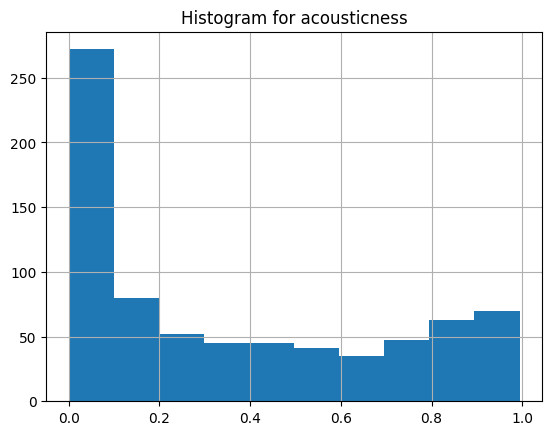

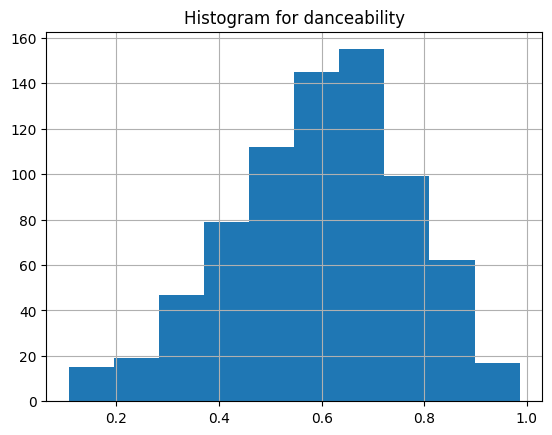

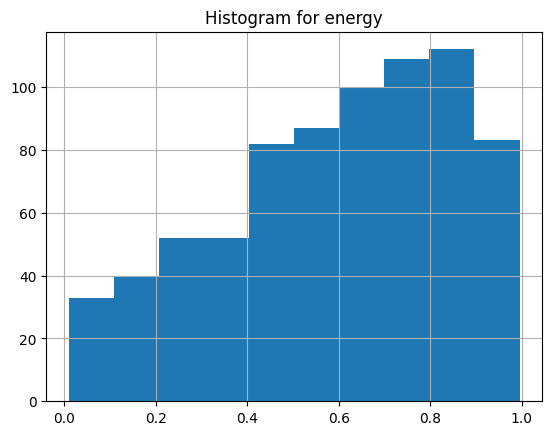

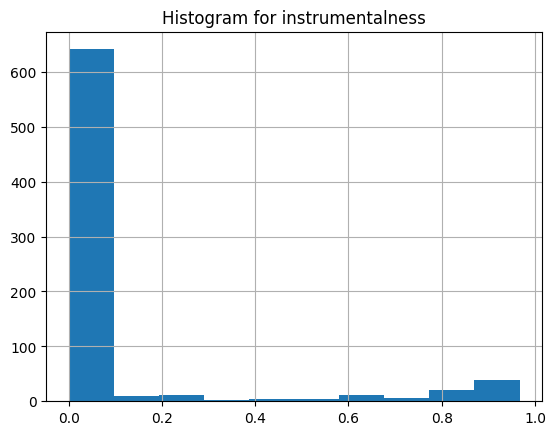

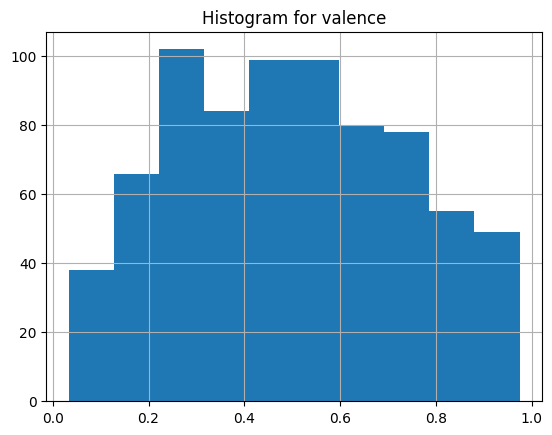

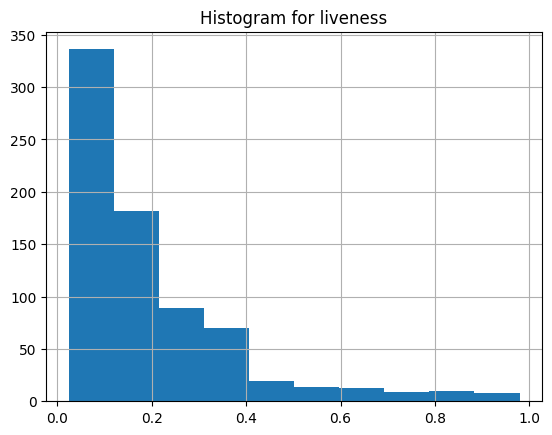

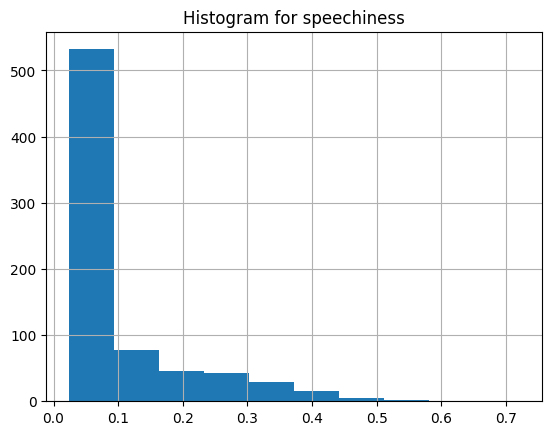

In [152]:
relative = ["acousticness", "danceability", "energy", "instrumentalness", "valence", "liveness", "speechiness"]

for key in relative:
    df[key].hist()
    plt.title(f"Histogram for {key}")
    plt.show()

Todos los valores de estas columnas corresponden a lo esperado. No hay outliers ni valores que podrian llegar a representar un valor nulo.

Tenemos tambien variables categoricas que representan categorias

### Variables categoricas

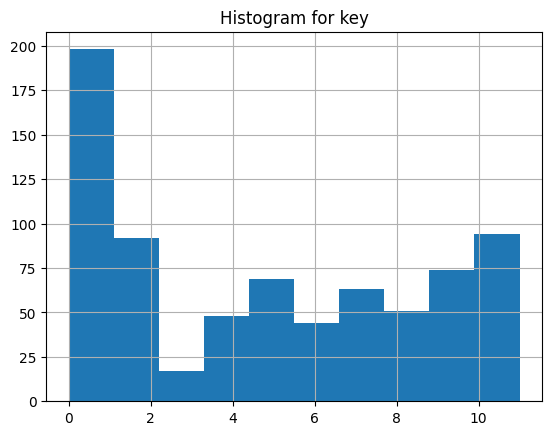

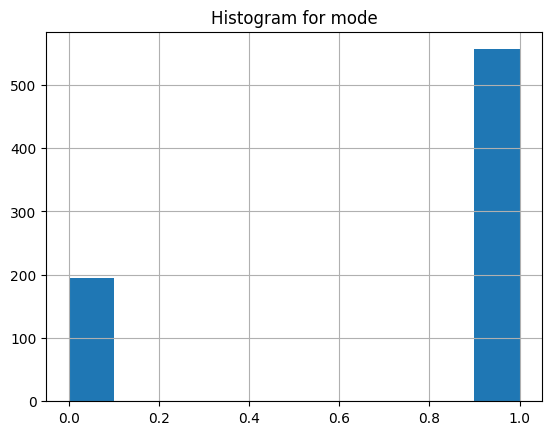

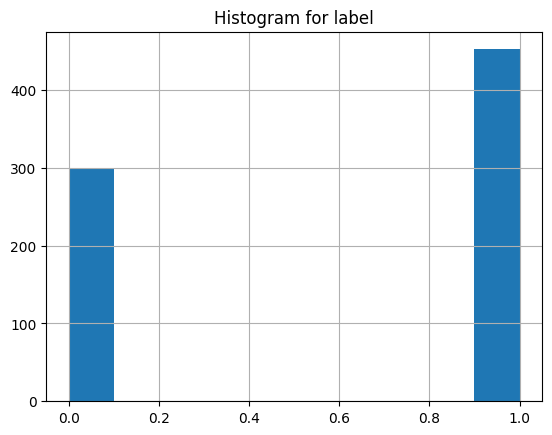

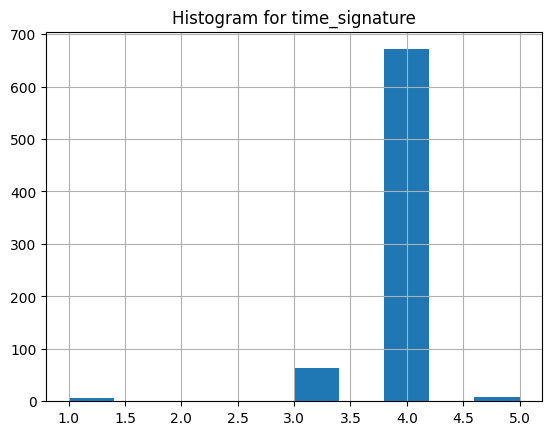

In [153]:
categorical = ["key", "mode", "label", "time_signature"]

for key in categorical:
    df[key].hist()
    plt.title(f"Histogram for {key}")
    plt.show()

Encontramos que pareciera necesario hacer un one hot encoding para time_signature y para key, ya que ambas representan de forma numerica caracteristicas.

In [154]:
dummies_ts = pd.get_dummies(df["time_signature"])
dummies_key = pd.get_dummies(df["key"])

dummies_ts = dummies_ts.add_prefix('time_signature_') 
dummies_key = dummies_key.add_prefix('key_') 

In [155]:
df = pd.concat([df,dummies_ts ,dummies_key], axis=1)
df = df.drop(columns=['time_signature', 'key'])

In [156]:
df

,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.713000,0.514,100125,0.521,0.816000,0.1120,-14.835,0,0.0444,119.879,...,False,False,False,False,False,False,True,False,False,False
1,0.192000,0.714,207019,0.614,0.000000,0.2630,-6.935,1,0.0319,123.969,...,False,False,True,False,False,False,False,False,False,False
2,0.333000,0.630,216200,0.455,0.000004,0.1270,-9.290,1,0.0292,139.931,...,False,False,False,True,False,False,False,False,False,False
3,0.601000,0.810,136413,0.221,0.210000,0.1840,-11.005,1,0.0429,109.960,...,False,False,False,True,False,False,False,False,False,False
4,0.883000,0.465,181440,0.459,0.000173,0.0692,-8.137,0,0.0351,90.807,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.000175,0.374,333827,0.943,0.000156,0.1250,-4.108,0,0.0556,112.084,...,False,False,False,False,True,False,False,False,False,False
746,0.001970,0.487,213000,0.867,0.006020,0.0968,-3.293,0,0.0543,160.048,...,False,False,False,False,False,False,False,False,True,False
747,0.916000,0.605,125867,0.314,0.000000,0.3590,-7.631,1,0.0327,138.148,...,False,False,False,False,False,False,False,False,False,False
748,0.168000,0.700,249493,0.823,0.000028,0.1220,-6.892,1,0.0373,144.060,...,False,True,False,False,False,False,False,False,False,False


Y mode podemos pasarlo de numerico a booleano para evitarnos manejar valores numericos donde no son necesarios

In [157]:
df['mode'] = df['mode'].astype(bool)
df

,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.713000,0.514,100125,0.521,0.816000,0.1120,-14.835,False,0.0444,119.879,...,False,False,False,False,False,False,True,False,False,False
1,0.192000,0.714,207019,0.614,0.000000,0.2630,-6.935,True,0.0319,123.969,...,False,False,True,False,False,False,False,False,False,False
2,0.333000,0.630,216200,0.455,0.000004,0.1270,-9.290,True,0.0292,139.931,...,False,False,False,True,False,False,False,False,False,False
3,0.601000,0.810,136413,0.221,0.210000,0.1840,-11.005,True,0.0429,109.960,...,False,False,False,True,False,False,False,False,False,False
4,0.883000,0.465,181440,0.459,0.000173,0.0692,-8.137,False,0.0351,90.807,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.000175,0.374,333827,0.943,0.000156,0.1250,-4.108,False,0.0556,112.084,...,False,False,False,False,True,False,False,False,False,False
746,0.001970,0.487,213000,0.867,0.006020,0.0968,-3.293,False,0.0543,160.048,...,False,False,False,False,False,False,False,False,True,False
747,0.916000,0.605,125867,0.314,0.000000,0.3590,-7.631,True,0.0327,138.148,...,False,False,False,False,False,False,False,False,False,False
748,0.168000,0.700,249493,0.823,0.000028,0.1220,-6.892,True,0.0373,144.060,...,False,True,False,False,False,False,False,False,False,False


De esta manera logramos encodear las variables categoricas

### Variables nominales

Hay algunas variables que son nominales, es decir, representan un valor concreto de alguna medicion. No son ni relativas ni categoricas

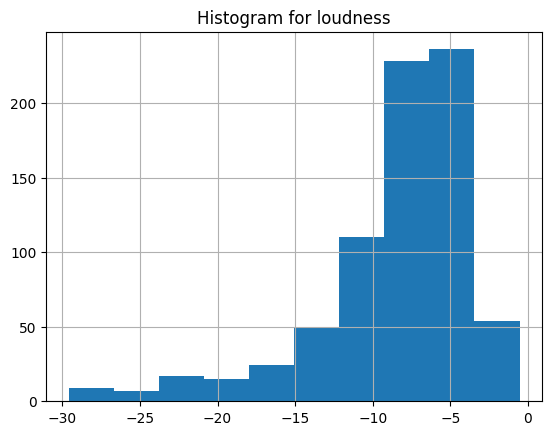

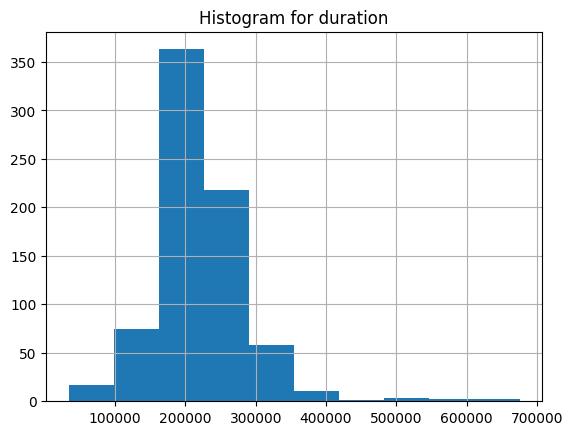

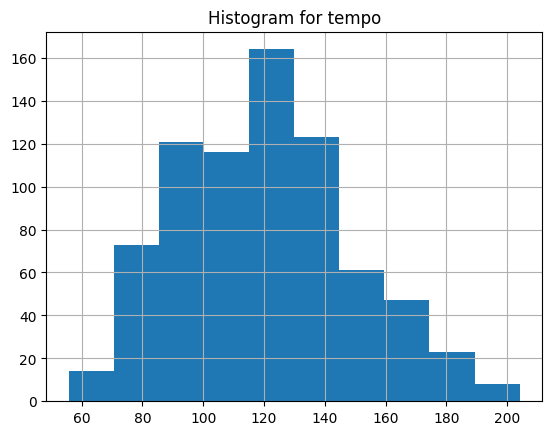

In [158]:
nominal = ["loudness", "duration", "tempo"]

for key in nominal:
    df[key].hist()
    plt.title(f"Histogram for {key}")
    plt.show()

Todos los valores caen dentro de los esperado, no se identifica ningun outlier

### Dataset actual

In [159]:
df

,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.713000,0.514,100125,0.521,0.816000,0.1120,-14.835,False,0.0444,119.879,...,False,False,False,False,False,False,True,False,False,False
1,0.192000,0.714,207019,0.614,0.000000,0.2630,-6.935,True,0.0319,123.969,...,False,False,True,False,False,False,False,False,False,False
2,0.333000,0.630,216200,0.455,0.000004,0.1270,-9.290,True,0.0292,139.931,...,False,False,False,True,False,False,False,False,False,False
3,0.601000,0.810,136413,0.221,0.210000,0.1840,-11.005,True,0.0429,109.960,...,False,False,False,True,False,False,False,False,False,False
4,0.883000,0.465,181440,0.459,0.000173,0.0692,-8.137,False,0.0351,90.807,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.000175,0.374,333827,0.943,0.000156,0.1250,-4.108,False,0.0556,112.084,...,False,False,False,False,True,False,False,False,False,False
746,0.001970,0.487,213000,0.867,0.006020,0.0968,-3.293,False,0.0543,160.048,...,False,False,False,False,False,False,False,False,True,False
747,0.916000,0.605,125867,0.314,0.000000,0.3590,-7.631,True,0.0327,138.148,...,False,False,False,False,False,False,False,False,False,False
748,0.168000,0.700,249493,0.823,0.000028,0.1220,-6.892,True,0.0373,144.060,...,False,True,False,False,False,False,False,False,False,False


Para poder trabajar de forma mas comoda con estas variables y que no genere problemas en los diferentes algoritmos se van a normalizar

In [160]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[relative + nominal])
df[relative + nominal] = scaled_values

In [161]:
df.describe()

,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,label
count,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,750.000000
mean,1.728987e-16,-3.789561e-17,-6.868580e-17,1.113184e-16,1.894781e-17,7.105427e-17,2.936910e-16,-1.160553e-16,9.237056e-17,-1.877017e-16,0.602667
std,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,0.489673
min,-1.056814e+00,-2.846870e+00,-2.841952e+00,-2.310799e+00,-3.859309e-01,-1.010626e+00,-4.188071e+00,-7.221224e-01,-2.279993e+00,-1.938240e+00,0.000000
25%,-9.469648e-01,-6.772774e-01,-5.282331e-01,-6.752907e-01,-3.859309e-01,-6.131389e-01,-3.304446e-01,-6.026705e-01,-7.548791e-01,-8.365721e-01,0.000000
50%,-3.338290e-01,5.561447e-02,-7.634928e-02,1.474014e-01,-3.858916e-01,-4.190437e-01,2.460896e-01,-4.798740e-01,-1.062306e-02,-5.980857e-02,1.000000
75%,9.495127e-01,6.939865e-01,3.680586e-01,8.318259e-01,-3.772879e-01,3.457874e-01,6.774230e-01,1.341084e-01,6.230428e-01,7.816853e-01,1.000000
max,1.882449e+00,2.265923e+00,6.945679e+00,1.583409e+00,3.336907e+00,4.369954e+00,1.583824e+00,5.944246e+00,2.953407e+00,1.994856e+00,1.000000


## Imbalance del dataset

Si observamos el histograma de la variable que se busca predecir se puede notar que la cantidad de valores de cada una de las clases, aunque imbalanceado (hay mas ejemplos de canciones que le gustaron al usuario que de canciones que no) sigue siendo representativo. No es un escenario donde se tenga muy poca informacion de alguna de las clases

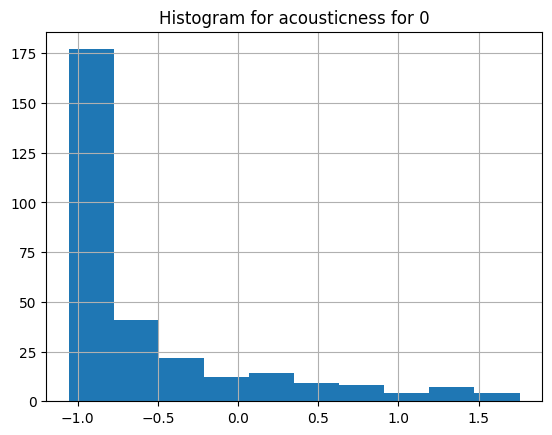

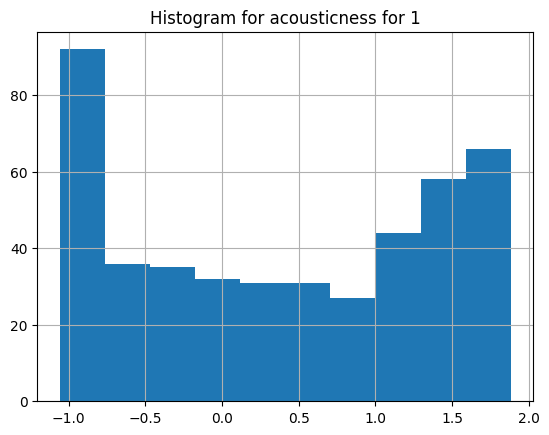

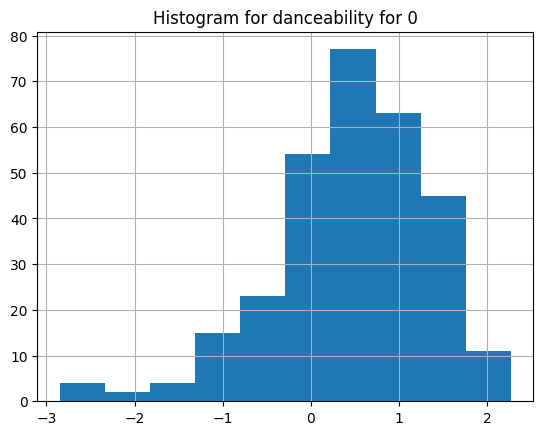

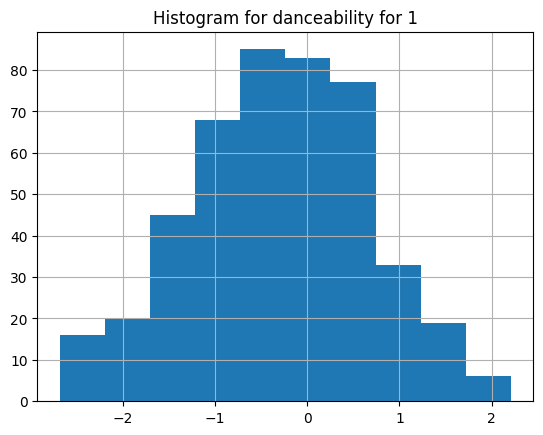

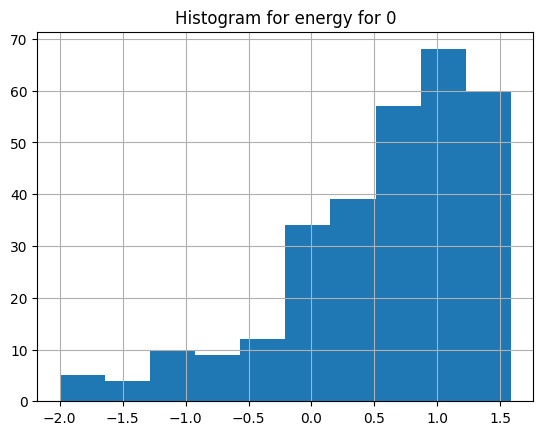

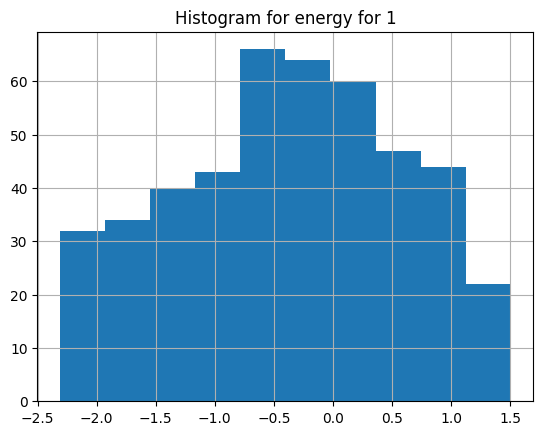

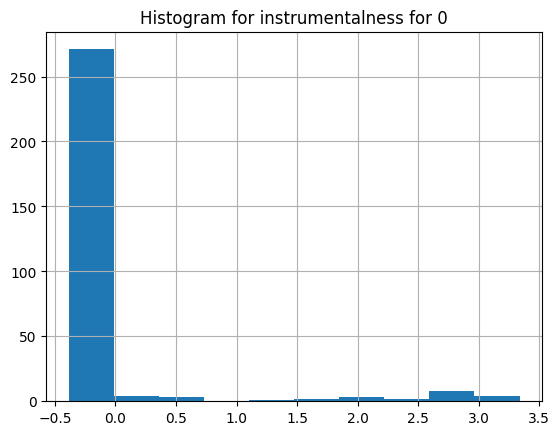

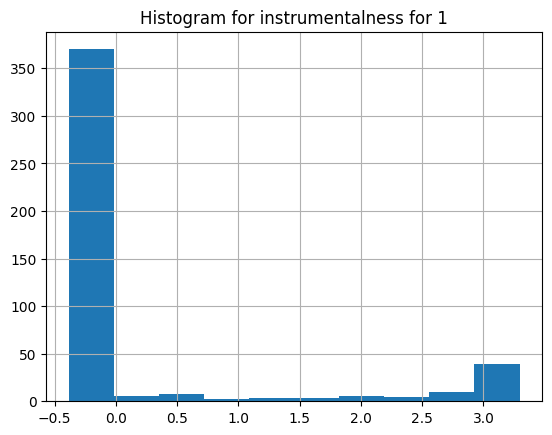

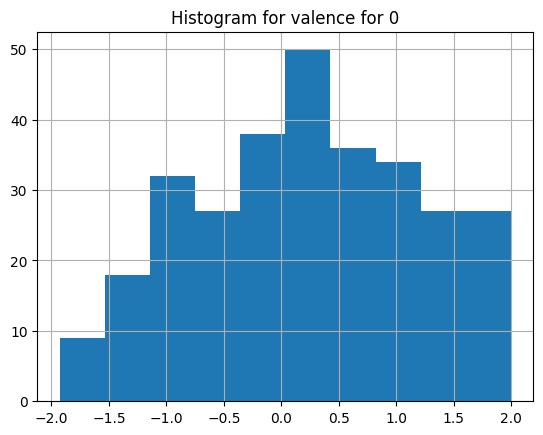

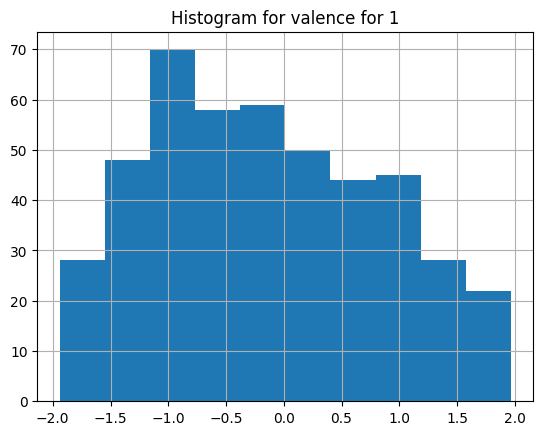

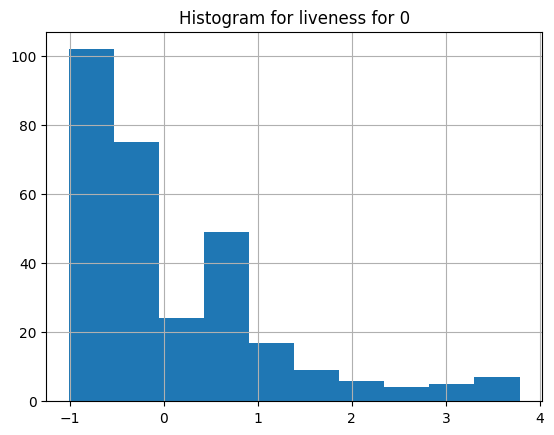

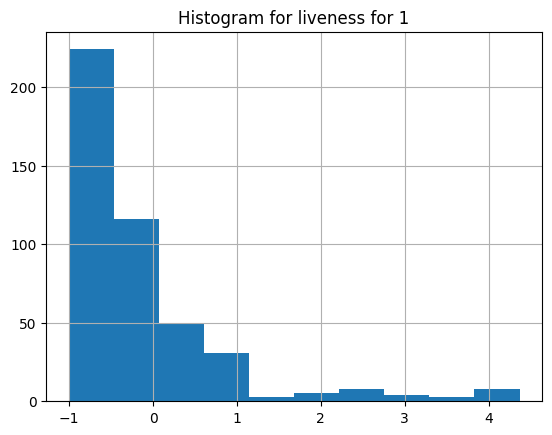

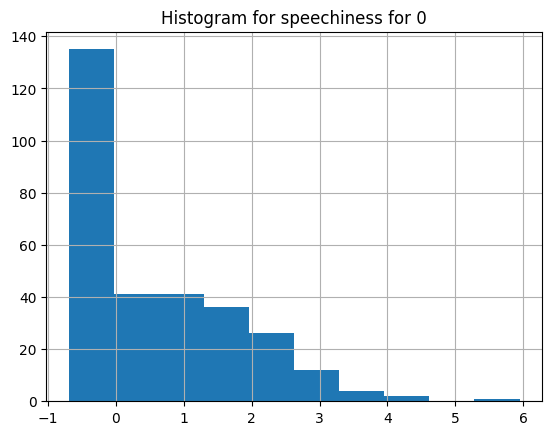

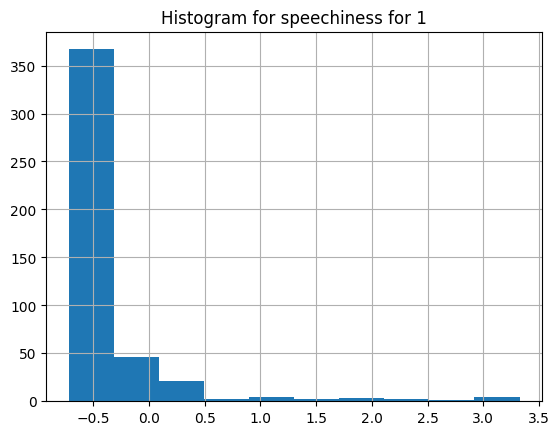

KeyError: 'key'

In [162]:
positive = df[df["label"] == 1]
negative = df[df["label"] == 0]

dfs = [negative, positive]

for key in relative + categorical + nominal:
    for idx, frame in enumerate(dfs):
        frame[key].hist()
        plt.title(f"Histogram for {key} for {idx}")
        plt.show()

Relacion entre positivos y negativos

In [ ]:
len(positive) / len(df)

0.6026666666666667

In [ ]:
len(negative)/len(df)

0.3973333333333333